In [1]:
import sys
sys.path.append('../lib')

import qaoaievalutils
import aoaiutils

In [2]:
question = """¿Se puede cambiar el rango de horario una vez que elegí uno?"""

robot_answer = """Estimada Silvina Pliego, según la documentación consultada, 
es posible cambiar el rango de horario una vez que se ha optado por uno en el programa ANTI TRÁFICO (LATAM) 1 . 
Sin embargo, se espera que una vez que se haya optado por un rango, se mantenga estable por al menos un mes 
para una fluida organización. Por favor, si necesitas más información o si esta respuesta no responde 
completamente a tu pregunta, no dudes en proporcionar más detalles para que pueda ayudarte mejor."""

human_answer = """Sí, pero se requiere que el rango de horario laboral se mantenga por un mes"""

json_result = qaoaievalutils.evaluate_query_better_response(user_query=question,
                                                    response_a=robot_answer, 
                                                    response_b=human_answer)
print(json_result)

[
  {
    "test_id": "1",
    "test": "Similarity",
    "result": 1,
    "reason": "Both responses mention the possibility of changing the schedule."
  },
  {
    "test_id": "2",
    "test": "Response A Correctness",
    "result": 1,
    "reason": "The response provides additional information and offers further assistance."
  },
  {
    "test_id": "3",
    "test": "Response B Correctness",
    "result": 1,
    "reason": "The response is correct but lacks detail."
  },
  {
    "test_id": "4",
    "test": "Better response",
    "result": "A",
    "reason": "Response A provides more information and offers further assistance."
  },
  {
    "test_id": "5",
    "test": "Score A",
    "result": "8",
    "reason": "The response is informative and offers further assistance, but could be more concise."
  },
  {
    "test_id": "6",
    "test": "Score B",
    "result": "6",
    "reason": "The response is correct but lacks detail and does not offer further assistance."
  }
]


In [22]:
OpenAI = json_result.replace('\n', '')

OpenaAI_Resultado = json.loads(OpenAI)

print(OpenaAI_Resultado)

[{'test_id': '1', 'test': 'Similarity', 'result': 1, 'reason': 'Both responses mention the possibility of changing the schedule.'}, {'test_id': '2', 'test': 'Response A Correctness', 'result': 1, 'reason': 'The response provides additional information and offers further assistance.'}, {'test_id': '3', 'test': 'Response B Correctness', 'result': 1, 'reason': 'The response is correct but lacks detail.'}, {'test_id': '4', 'test': 'Better response', 'result': 'A', 'reason': 'Response A provides more information and offers further assistance.'}, {'test_id': '5', 'test': 'Score A', 'result': '8', 'reason': 'The response is informative and offers further assistance, but could be more concise.'}, {'test_id': '6', 'test': 'Score B', 'result': '6', 'reason': 'The response is correct but lacks detail and does not offer further assistance.'}]


In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from difflib import SequenceMatcher

with open('People_Argentina_2years.json') as archivo:
    datos = json.load(archivo)

expected_responses = []

for pregunta in datos['questions_answers']:
    expected_response = pregunta.get('expected_response', None)
    if expected_response:
        expected_responses.append(expected_response)

for response in expected_responses:
    print(response)

Estimado Fulanito Garza, una de las tantas ventajas de trabar en Baufest son las siguientes: BAU Dollar, donde recibes el beneficio del 20% de tu salario en dólares; BAU Health, reintegro del costo del gimnasio u otras actividades deportivas; BAU net, recibe una bonificación del costo del servicio de internet; BAU Lunch, Baufest te paga el lunch; BAU Home, se te reintegra el costo de la mudanza y Anti tráfico, tienes la posibilidad de ajustar tu horario laboral para evitar el tráfico.
Sí, pero se requiere que el rango de horario laboral se mantenga por un mes
Si, puedes presentar el contrato o escritura al nombre de otra persona, siempre que presentes un documento legal que respalde la convivencia, por ejemplo, como un certificado de concubinato, matrimonio o unión civil. Esto ayudará a garantizar que tu solicitud sea considerada de manera adecuada
A través de la App de Pedidos ya (Menú/PedidosYa Pagos) verás las acreditaciones que tenes disponible para usar
No la acreditación es seman

In [17]:
respuestaOA = "Sí, pero se requiere que el rango de horario laboral se mantenga por un mes"

def calcular_similitud(respuestaOA, expected_responses, umbral_similitud):
    comparador = SequenceMatcher(None, respuestaOA, expected_responses)
    similitud = comparador.ratio()

    return similitud >= umbral_similitud

def respuestas_similares(respuestaOA, expected_responses, umbral_similitud=0.6):
    resultados = []

    for expected_response in expected_responses:
        similitud = calcular_similitud(respuestaOA, expected_response, umbral_similitud)
        
        resultado = {
            "robot_answer": respuestaOA,
            "expected_answer": expected_response,
            "SequenceMatcher_result": {
                "similar": int(similitud),
                "argument": umbral_similitud
            },
            "chatgpt_result": [
                OpenaAI_Resultado
            ]
            
        }

        resultados.append(resultado)
        

    return resultados

resultados = respuestas_similares(respuestaOA, expected_responses)

with open("resultado.json", "w") as archivo_resultados:
    json.dump(resultados, archivo_resultados, indent=2)

print("Resultados guardados en 'resultados.json'")
print(resultados)

Resultados guardados en 'resultados.json'
[{'robot_answer': 'Sí, pero se requiere que el rango de horario laboral se mantenga por un mes', 'expected_answer': 'Estimado Fulanito Garza, una de las tantas ventajas de trabar en Baufest son las siguientes: BAU Dollar, donde recibes el beneficio del 20% de tu salario en dólares; BAU Health, reintegro del costo del gimnasio u otras actividades deportivas; BAU net, recibe una bonificación del costo del servicio de internet; BAU Lunch, Baufest te paga el lunch; BAU Home, se te reintegra el costo de la mudanza y Anti tráfico, tienes la posibilidad de ajustar tu horario laboral para evitar el tráfico.', 'SequenceMatcher_result': {'similar': 0, 'argument': 0.6}, 'chatgpt_result': [[{'test_id': '1', 'test': 'Similarity', 'result': 1, 'reason': 'Both responses mention the possibility of changing the schedule.'}, {'test_id': '2', 'test': 'Response A Correctness', 'result': 1, 'reason': 'The response provides additional information and offers further 

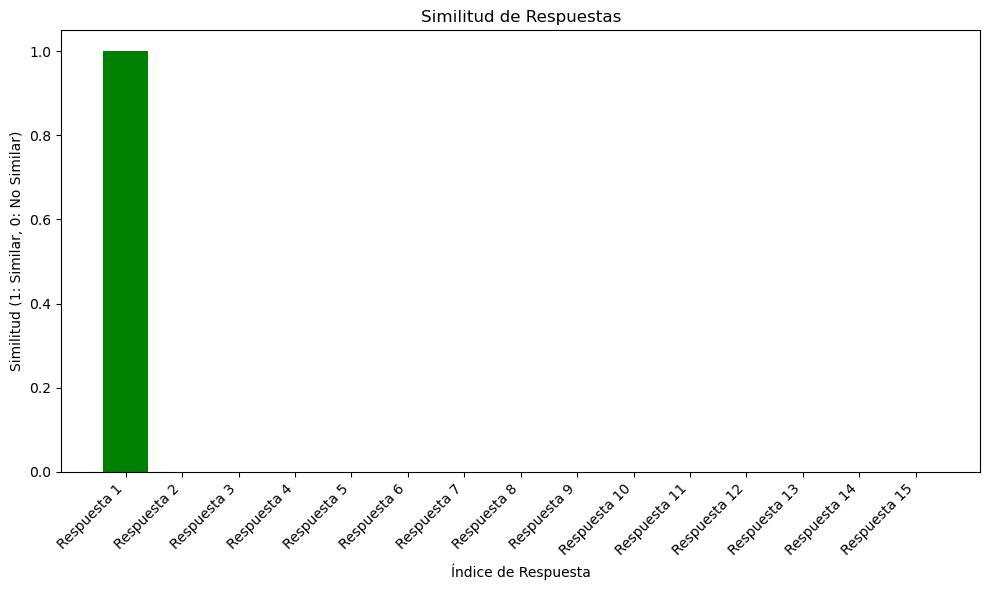

In [5]:
with open("resultados.json") as archivo_resultados:
    informacion = json.load(archivo_resultados)
    
df = pd.DataFrame(informacion)

num_respuestas = len(df)
etiquetas_respuestas = [f"Respuesta {i+1}" for i in range(num_respuestas)]

plt.figure(figsize=(10, 6))
plt.bar(df.index, df['SequenceMatcher_result'].apply(lambda x: x['similar']), color=['green' if sim == 1 else 'red' for sim in df['SequenceMatcher_result'].apply(lambda x: x['similar'])])
plt.title("Similitud de Respuestas")
plt.xlabel("Índice de Respuesta")
plt.ylabel("Similitud (1: Similar, 0: No Similar)")
plt.xticks(df.index, etiquetas_respuestas, rotation=45, ha="right")
plt.tight_layout()

plt.show()

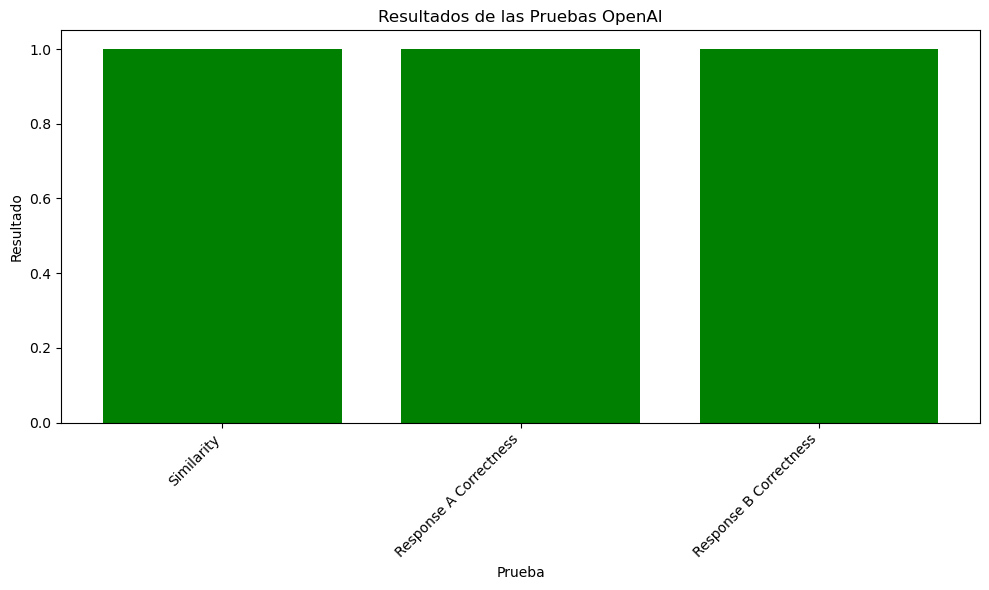

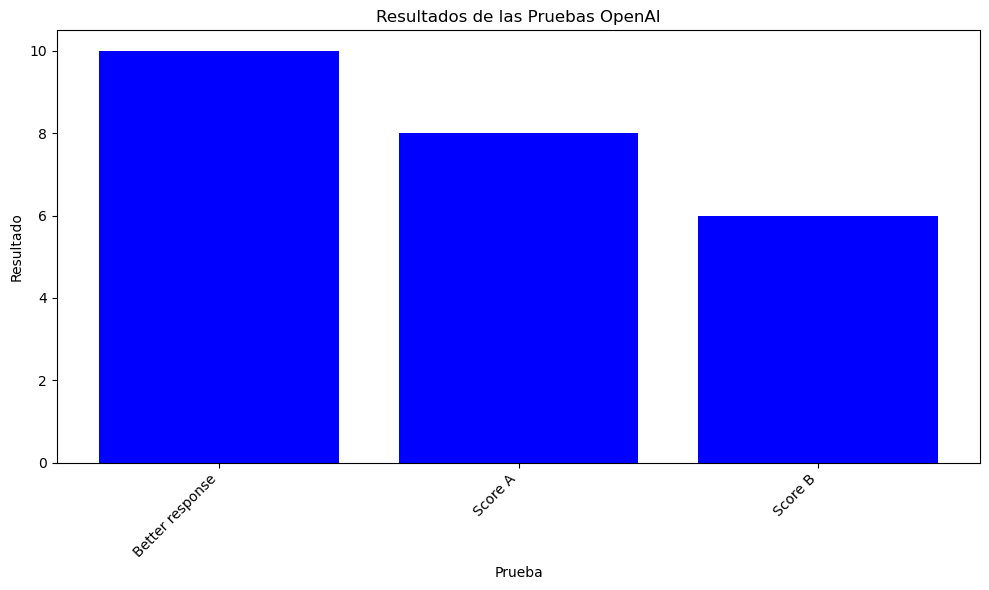

In [26]:
informacion = [item for item in OpenaAI_Result if str(item['result']).isdigit()]

tests = [item['test'] for item in informacion]
results = [int(item['result']) for item in informacion]

tests_1 = tests[:3]
results_1 = results[:3]

tests_2 = tests[3:]
results_2 = results[3:]

plt.figure(figsize=(10, 6))
plt.bar(tests_1, results_1, color='green')
plt.title('Resultados de las Pruebas OpenAI')
plt.xlabel('Prueba')
plt.ylabel('Resultado')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(tests_2, results_2, color='blue')
plt.title('Resultados de las Pruebas OpenAI')
plt.xlabel('Prueba')
plt.ylabel('Resultado')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()